In [1]:
!pip install bertopic
!pip install sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 22.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 21.5 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.5 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039294 sha256=b74207c00dfe531bdc21be5ba0e6c580d027eff37d5d009765d1e28e7fb8c202
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

In [2]:
#!pip install umap
#!pip install hdbscan

In [2]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from bertopic.representation import KeyBERTInspired

In [3]:
import pandas as pd
from google.colab import drive
import torch

In [4]:
#import umap
import matplotlib.pyplot as plt
#import hdbscan

# Prepare cleaned article data

In [5]:
# Mount Google Drive
drive.mount('/content/gdrive')

# Define the file path to the just cleaned df
# (I also put them here: https://drive.google.com/drive/folders/1lXVVxWaR-fJ4htHx8J5C2HtoPSiTM_BX if you want to bind there)
path = "/content/gdrive/MyDrive/AdvancedML/metadata_w_2020articles_cleaned.csv"

df = pd.read_csv(path,  index_col=0)

Mounted at /content/gdrive


In [6]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [7]:
#test_article = df.loc[0:50]
#test_text = test_article['title_text']

text_list = df['title_text'].tolist()

In [8]:
text_list[0:1]

['trump shifts tone, says he’s ‘proud’ of fed amid coronavirus turmoil president trump on monday said he was “proud” of federal reserve chairman jerome powell’s handling of the economic turmoil brought on by the coronavirus pandemic, backing down from more than a year of criticizing his hand-picked fed chief and threatening his job security.trump praised powell during a monday evening briefing at the white house after the fed that morning drastically expanded its efforts to protect the u.s. economy and financ']

In [9]:
text_list[0:10]

['trump shifts tone, says he’s ‘proud’ of fed amid coronavirus turmoil president trump on monday said he was “proud” of federal reserve chairman jerome powell’s handling of the economic turmoil brought on by the coronavirus pandemic, backing down from more than a year of criticizing his hand-picked fed chief and threatening his job security.trump praised powell during a monday evening briefing at the white house after the fed that morning drastically expanded its efforts to protect the u.s. economy and financ',
 'iran paid bounties for targeting us troops, intelligence reportedly suggests u.s. intelligence reportedly indicates iran’s government offered bounties to taliban fighters to target u.s. and coalition forces in afghanistan.a pentagon briefing document said a foreign government paid the haqqani network, led by\xa0a top taliban leader, to attack bagram air base\xa0last december, cnn reported.\xa0while the government in question is classified in the memo, two sources familiar with

In [10]:
len(text_list)


37044

# Implement BertTopic Model

note: Under the hood, BERTopic is using sentence-transformers to create embeddings for the documents you pass it.

We can change the embeddings, but I'm keeping it for now

In [ ]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(text_list)


modelpath = "/content/gdrive/MyDrive/AdvancedML/basemodel"
topic_model.save(modelpath)


In [77]:
#reduce the topics of already trained model
output = topic_model.reduce_topics(text_list, nr_topics = 100)


modelpath = "/content/gdrive/MyDrive/AdvancedML/basemodel_reducedtopic"
topic_model.save(modelpath)

2024-03-03 23:56:52,291 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [39]:
output

we can reduce the number of topics iteratively as long as a pair of topics is found that exceeds a minimum similarity of 0.9.

To use this option, we simply set nr_topics to "auto" before training our model:

https://towardsdatascience.com/interactive-topic-modeling-with-bertopic-1ea55e7d73d8

In [11]:
topic_model_autotreduce = BERTopic(nr_topics="auto")
topics, probs = topic_model_autotreduce.fit_transform(text_list)

modelpath = "/content/gdrive/MyDrive/AdvancedML/basemodel_reducedtopic_auto"
topic_model_autotreduce.save(modelpath)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2024-03-03 22:40:36,769 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


Topics are typically represented by a set of words. In BERTopic, these words are extracted from the documents using a class-based TF-IDF.

At times, you might not be happy with the representation of the topics that were created. This is possible when you selected to have only 1-gram words as representation. Perhaps you want to try out a different n-gram range or you have a custom vectorizer that you want to use.

To update the topic representation after training, we can use the function update_topics to update the topic representation with new parameters for c-TF-IDF:

https://towardsdatascience.com/interactive-topic-modeling-with-bertopic-1ea55e7d73d8

# Investigate model clusters and representations

In [78]:
modelpath = "/content/gdrive/MyDrive/AdvancedML/basemodel"
topic_model_full = BERTopic.load(modelpath)
modelpath = "/content/gdrive/MyDrive/AdvancedML/basemodel_reducedtopic"
topic_model = BERTopic.load(modelpath)
modelpath = "/content/gdrive/MyDrive/AdvancedML/basemodel_reducedtopic_auto"
topic_model_autotreduce = BERTopic.load(modelpath)

Get info about topics, including the number of articles per topic

In [79]:
print("num_topics_autoreduce",len(topic_model_autotreduce.get_topic_info()))
print("num_topics_defined_reduce",len(topic_model.get_topic_info()))
print("num_topics_full",len(topic_model_full.get_topic_info()))


num_topics_autoreduce 108
num_topics_defined_reduce 100
num_topics_full 545


In [81]:
#topic_model.get_topic_info()
#topic_model_autotreduce.get_topic_info()
topic_model_full.get_topic_info()

Topic  Count                                     Name  \
0       -1  11736                         -1_the_and_in_to   
1        0    664           0_facebook_twitter_tech_google   
2        1    444                1_mask_masks_wear_wearing   
3        2    420       2_relief_package_stimulus_trillion   
4        3    352  3_abortion_prolife_parenthood_abortions   
..     ...    ...                                      ...   
540    539     10            539_cancel_culture_rowling_jk   
541    540     10          540_haaland_deb_interior_native   
542    541     10           541_austin_dallas_abbott_texas   
543    542     10  542_carter_page_rosenstein_surveillance   
544    543     10         543_snyder_michigan_rick_breeder   

                                        Representation  \
0    [the, and, in, to, of, on, that, for, is, coro...   
1    [facebook, twitter, tech, google, ceo, big, ce...   
2    [mask, masks, wear, wearing, mandate, face, ma...   
3    [relief, package, stimulus, trillion, bill, bi...   
4    [abortion, prolife, parenthood, abortions, roe...   
..                                                 ...   
540  [cancel, culture, rowling, jk, writers, dezenh...   
541  [haaland, deb, interior, native, cabinet, dnm,...   
542  [austin, dallas, abbott, texas, crime, greg, p...   
543  [carter, page, rosenstein, surveillance, warra...   
544  [snyder, michigan, rick, breeder, hoadley, bel...   

                                   Representative_Docs  
0    [report: doj opened separate probe into hunter...  
1    [          senate judiciary committee to subpo...  
2    [donald trump: wear a mask, they have an impac...  
3    [house passes $3 trillion coronavirus relief p...  
4    [fact check: abortion industry claims ‘majorit...  
..                                                 ...  
540  [‘cancel culture is a cancer’: dean cain says ...  
541  [biden taps rep deb haaland to lead the interi...  
542  [dallas asks state to help fight spike in crim...  
543  [justice department lawyer who signed carter p...  
544  [michigan congressional nominee jon hoadley us...  

[545 rows x 5 columns]

In [96]:
topic_info = topic_model_full.get_topic_info()

df = pd.DataFrame(topic_info)
output_file_path = "/content/gdrive/MyDrive/AdvancedML/full_model_cluster_info.csv"
df.to_csv(output_file_path, index=False)



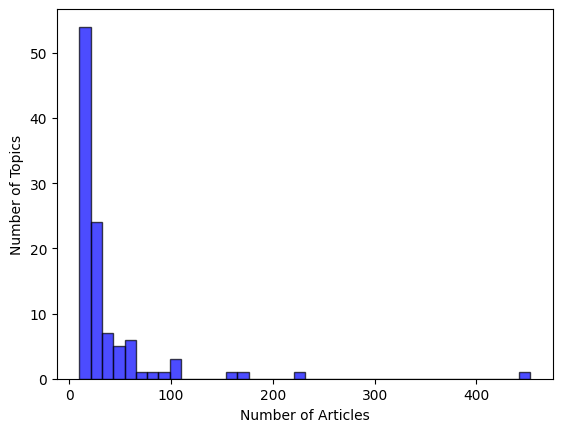

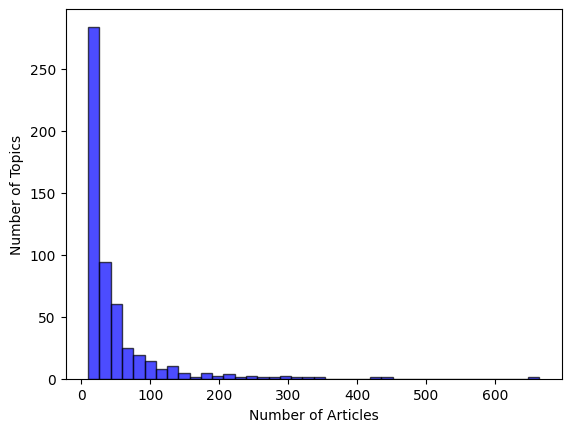

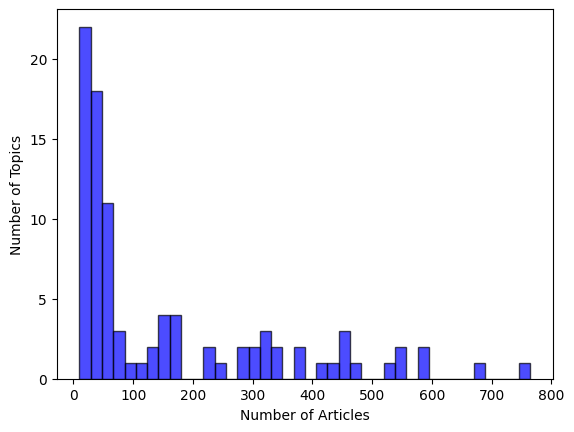

In [85]:
#df = pd.DataFrame(topic_model_autotreduce.get_topic_info())
model_list = [topic_model_autotreduce,topic_model_full,topic_model]

for model in model_list:
  df = pd.DataFrame(model.get_topic_info())

  #### FILTERING OUT THE EXTREME catch all topics
  df_filtered = df[df['Count'] <= 1000]

  # Creating a histogram
  plt.hist(df_filtered['Count'], bins=40, color='blue', edgecolor='black', alpha=0.7)

  model_name = str(model).split("(")[0]

  plt.xlabel('Number of Articles')
  plt.ylabel('Number of Topics')
  #plt.title(f'Dist of the size of Topic Clusters for Model: {model_name}')

  # Displaying the plot
  plt.show()

Get the topics with the most articles.
Ignore topic -1, its the catch all for all ungrouped articles.  

In [86]:
 topic_model.get_topic_freq().head()

Topic  Count
0      -1  11736
15      0   2508
16      1   2055
18      2   1590
21      3   1474

In [87]:
 topic_model_autotreduce.get_topic_freq().head()

Topic  Count
0       0  21287
1      -1  11871
2       1    453
3       2    222
50      3    169

In [95]:
 topic_model_full.get_topic_freq().head(50)


Topic  Count
0       -1  11736
18       0    664
3        1    444
2        2    420
53       3    352
118      4    323
12       5    310
172      6    304
19       7    288
75       8    277
333      9    260
9       10    253
152     11    244
46      12    238
17      13    217
71      14    216
8       15    215
238     16    213
145     17    204
98      18    203
307     19    177
4       20    175
143     21    175
94      22    175
59      23    174
150     24    161
245     25    155
209     26    153
16      27    147
135     28    143
223     29    141
324     30    137
160     31    136
339     32    135
310     33    134
258     34    133
29      35    131
157     36    129
70      37    128
39      38    127
420     39    125
11      40    123
72      41    116
42      42    111
186     43    110
81      44    110
156     45    109
87      46    109
91      47    109
35      48    108

For a particular article, get the topic representatiosn words with the relative importance



In [89]:
topic_model_full.get_topic(0)

[('facebook', 0.018957144465693684),
 ('twitter', 0.018743580209310447),
 ('tech', 0.016006085383432185),
 ('google', 0.01335299812403585),
 ('ceo', 0.011059719731670381),
 ('big', 0.009580292291349614),
 ('censorship', 0.009291100327832076),
 ('antitrust', 0.009286239183787974),
 ('social', 0.008936551308229545),
 ('dorsey', 0.007967788410039667)]

In [90]:
model_list = [topic_model_autotreduce,topic_model_full,topic_model]

for model in model_list:
  #print(model)
  info = model.get_topic(0)
  print(info)


[('the', 0.008393783001029304), ('to', 0.00795587163960812), ('of', 0.007728517498243398), ('in', 0.007388170994040241), ('on', 0.007199913482027161), ('and', 0.007125544025908167), ('that', 0.006789601124630841), ('trump', 0.006713627455928723), ('for', 0.006676047796896656), ('president', 0.006529774336416665)]
[('facebook', 0.018957144465693684), ('twitter', 0.018743580209310447), ('tech', 0.016006085383432185), ('google', 0.01335299812403585), ('ceo', 0.011059719731670381), ('big', 0.009580292291349614), ('censorship', 0.009291100327832076), ('antitrust', 0.009286239183787974), ('social', 0.008936551308229545), ('dorsey', 0.007967788410039667)]
[('biden', 0.021183453213729917), ('joe', 0.015440968979035994), ('vice', 0.012869230544254321), ('presidential', 0.01252297653355024), ('president', 0.011109870044956727), ('debate', 0.010420012363400058), ('sanders', 0.010391965270793155), ('hunter', 0.009345139589820792), ('bidens', 0.009185852864422805), ('pence', 0.008924970229103952)]


In [25]:
topic_model.get_document_info(text_list)

Document  Topic  \
0      trump shifts tone, says he’s ‘proud’ of fed am...     53   
1      iran paid bounties for targeting us troops, in...    185   
2      us forces rescue american citizen held hostage...     -1   
3      trump slams relief bill, calls on congress to ...     58   
4      naomi osaka withdraws from french open to focu...     -1   
...                                                  ...    ...   
37039  listen: 2020 republican national convention by...     64   
37040  new poll: americans overwhelmingly support vot...     -1   
37041  biden to pick north carolina regulator michael...     57   
37042  harris: 'you ushered in a new day for america'...     14   
37043  biden names health secretary, covid czar, othe...    206   

                                           Name  \
0                53_economy_economic_kudlow_dow   
1      185_bounties_bounty_intelligence_russian   
2                              -1_in_the_and_of   
3           58_stimulus_payments_billion_checks   
4                              -1_in_the_and_of   
...                                         ...   
37039       64_convention_speakers_dnc_national   
37040                          -1_in_the_and_of   
37041     57_climate_environmental_change_kerry   
37042             14_harris_kamala_mate_running   
37043           206_becerra_xavier_hhs_becerras   

                                          Representation  \
0      [economy, economic, kudlow, dow, recession, co...   
1      [bounties, bounty, intelligence, russian, russ...   
2      [in, the, and, of, to, trump, on, president, f...   
3      [stimulus, payments, billion, checks, relief, ...   
4      [in, the, and, of, to, trump, on, president, f...   
...                                                  ...   
37039  [convention, speakers, dnc, national, democrat...   
37040  [in, the, and, of, to, trump, on, president, f...   
37041  [climate, environmental, change, kerry, epa, g...   
37042  [harris, kamala, mate, running, vice, dca, tic...   
37043  [becerra, xavier, hhs, becerras, human, health...   

                                     Representative_Docs  \
0      [kudlow predicts 'self-sustaining' economic re...   
1      [          james inhofe vows ‘strong response’...   
2      [democrats demand trump stop building border w...   
3      [for coronavirus relief, trump demands congres...   
4      [democrats demand trump stop building border w...   
...                                                  ...   
37039  [2020 republican national convention speakers ...   
37040  [democrats demand trump stop building border w...   
37041  [biden introduces climate team, calls climate ...   
37042  [chris wallace claims kamala harris is ‘not fa...   
37043  [biden botches hhs pick becerra's name, calls ...   

                                             Top_n_words  Probability  \
0      economy - economic - kudlow - dow - recession ...     0.635174   
1      bounties - bounty - intelligence - russian - r...     0.371031   
2      in - the - and - of - to - trump - on - presid...     0.000000   
3      stimulus - payments - billion - checks - relie...     0.785846   
4      in - the - and - of - to - trump - on - presid...     0.000000   
...                                                  ...          ...   
37039  convention - speakers - dnc - national - democ...     1.000000   
37040  in - the - and - of - to - trump - on - presid...     0.000000   
37041  climate - environmental - change - kerry - epa...     0.631341   
37042  harris - kamala - mate - running - vice - dca ...     0.529871   
37043  becerra - xavier - hhs - becerras - human - he...     0.561567   

       Representative_document  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  
...                        ...  
37039                    False  
37040                    False  
37041         

In [24]:
topic_model_autotreduce.get_document_info(text_list)

Document  Topic  \
0      trump shifts tone, says he’s ‘proud’ of fed am...      0   
1      iran paid bounties for targeting us troops, in...      0   
2      us forces rescue american citizen held hostage...     -1   
3      trump slams relief bill, calls on congress to ...      0   
4      naomi osaka withdraws from french open to focu...      1   
...                                                  ...    ...   
37039  listen: 2020 republican national convention by...      0   
37040  new poll: americans overwhelmingly support vot...      0   
37041  biden to pick north carolina regulator michael...      0   
37042  harris: 'you ushered in a new day for america'...      0   
37043  biden names health secretary, covid czar, othe...      0   

                            Name  \
0                 0_the_to_of_in   
1                 0_the_to_of_in   
2                -1_the_to_of_in   
3                 0_the_to_of_in   
4      1_mask_masks_wear_wearing   
...                          ...   
37039             0_the_to_of_in   
37040             0_the_to_of_in   
37041             0_the_to_of_in   
37042             0_the_to_of_in   
37043             0_the_to_of_in   

                                          Representation  \
0      [the, to, of, in, on, and, that, trump, for, p...   
1      [the, to, of, in, on, and, that, trump, for, p...   
2       [the, to, of, in, and, on, that, for, trump, is]   
3      [the, to, of, in, on, and, that, trump, for, p...   
4      [mask, masks, wear, wearing, mandate, face, pu...   
...                                                  ...   
37039  [the, to, of, in, on, and, that, trump, for, p...   
37040  [the, to, of, in, on, and, that, trump, for, p...   
37041  [the, to, of, in, on, and, that, trump, for, p...   
37042  [the, to, of, in, on, and, that, trump, for, p...   
37043  [the, to, of, in, on, and, that, trump, for, p...   

                                     Representative_Docs  \
0      [trump says he will not call george w. bush or...   
1      [trump says he will not call george w. bush or...   
2      [biden facing enthusiasm gap even as polls sho...   
3      [trump says he will not call george w. bush or...   
4      [donald trump: wear a mask, they have an impac...   
...                                                  ...   
37039  [trump says he will not call george w. bush or...   
37040  [trump says he will not call george w. bush or...   
37041  [trump says he will not call george w. bush or...   
37042  [trump says he will not call george w. bush or...   
37043  [trump says he will not call george w. bush or...   

                                             Top_n_words  Probability  \
0      the - to - of - in - on - and - that - trump -...     0.578901   
1      the - to - of - in - on - and - that - trump -...     0.355524   
2      the - to - of - in - and - on - that - for - t...     0.000000   
3      the - to - of - in - on - and - that - trump -...     1.000000   
4      mask - masks - wear - wearing - mandate - face...     0.221640   
...                                                  ...          ...   
37039  the - to - of - in - on - and - that - trump -...     0.537735   
37040  the - to - of - in - on - and - that - trump -...     0.746635   
37041  the - to - of - in - on - and - that - trump -...     0.498991   
37042  the - to - of - in - on - and - that - trump -...     0.973679   
37043  the - to - of - in - on - and - that - trump -...     0.509935   

       Representative_document  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  
...                        ...  
37039                    False  
37040                    False  
37041                    False  
37042                    False  
37043                    False  

[37044 rows x 8 columns]

Autoreduce -- no good!

In [97]:
document_info = topic_model_full.get_document_info(text_list)

df = pd.DataFrame(document_info)
output_file_path = "/content/gdrive/MyDrive/AdvancedML/full_model_documents_classified.csv"
df.to_csv(output_file_path, index=False)

In [27]:
len(text_list)

37044

# Topic Representations

In [ ]:
# Fine-tune your topic representations
#representation_model = KeyBERTInspired()
#topic_model = BERTopic(representation_model=representation_model)

In [ ]:
#To make this work, need the topics associates with the best model feed in

#topic_model_full.update_topics(text_list, topics, n_gram_range=(1, 3)) #, stop_words="english")
#topic_model.update_topics(text_list, topics, n_gram_range=(1, 3)) #, stop_words="english")


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(ngram_range=(1, 3), stop_words="english")
# model.update_topics(text_list, topics, vectorizer=cv)

In [63]:
topic_model_full.get_topic(0)


[('twitter', 0.010360983458346731),
 ('facebook', 0.009387064584855906),
 ('tech', 0.00776872527866801),
 ('google', 0.0060250721671156705),
 ('big tech', 0.005652472758598213),
 ('social media', 0.005546833263969626),
 ('ceo', 0.005269535592110063),
 ('big', 0.005034466413519082),
 ('social', 0.004885738422080778),
 ('media', 0.0041315512900023475)]

In [67]:
topic_model.get_topic(0)

[('the', 0.011957887711013105),
 ('biden', 0.010009680533491648),
 ('to', 0.00994183387352865),
 ('in', 0.009419058560846757),
 ('of', 0.009121768342559055),
 ('and', 0.007723173406175188),
 ('on', 0.007496268176815068),
 ('joe', 0.007052869107242018),
 ('president', 0.007005686213357696),
 ('for', 0.006707816001836771)]

# Visualizations

In [91]:
topic_model_full.visualize_topics()

In [92]:
topic_model.visualize_topics()


In [93]:
topic_model_autotreduce.visualize_topics()

### Traditional cluster map

In [ ]:

# umap_embeddings = umap.UMAP(n_neighbors=15,
#                             n_components=5,
#                             metric='cosine').fit_transform(embeddings)

In [ ]:


# cluster = hdbscan.HDBSCAN(min_cluster_size=15,
#                           metric='euclidean',
#                           cluster_selection_method='eom').fit(umap_embeddings)

In [ ]:
# # Prepare data
# umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
# result = pd.DataFrame(umap_data, columns=['x', 'y'])
# result['labels'] = cluster.labels_

# # Visualize clusters
# fig, ax = plt.subplots(figsize=(20, 10))
# outliers = result.loc[result.labels == -1, :]
# clustered = result.loc[result.labels != -1, :]
# plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
# plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
# plt.colorbar()